In [56]:
# There are 14 attributes in each case of the dataset. They are:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
# Loading the Dataset

data = pd.read_csv("BostonHousingData.csv");
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [59]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [60]:
# Handling the null values

data = data.dropna()
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [61]:
# Print the correlation matrix

data.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.19,0.39,-0.05,0.42,-0.23,0.34,-0.37,0.61,0.56,0.27,-0.39,0.46,-0.40
ZN,-0.19,1.00,-0.52,-0.03,-0.52,0.34,-0.57,0.65,-0.30,-0.31,-0.42,0.17,-0.42,0.41
INDUS,0.39,-0.52,1.00,0.05,0.76,-0.40,0.64,-0.70,0.59,0.73,0.40,-0.34,0.60,-0.51
CHAS,-0.05,-0.03,0.05,1.00,0.08,0.10,0.07,-0.10,0.01,-0.03,-0.10,0.07,-0.04,0.17
NOX,0.42,-0.52,0.76,0.08,1.00,-0.32,0.73,-0.77,0.63,0.68,0.21,-0.38,0.59,-0.46
RM,-0.23,0.34,-0.40,0.10,-0.32,1.00,-0.25,0.22,-0.24,-0.32,-0.39,0.12,-0.64,0.72
AGE,0.34,-0.57,0.64,0.07,0.73,-0.25,1.00,-0.75,0.44,0.50,0.26,-0.28,0.60,-0.41
DIS,-0.37,0.65,-0.70,-0.10,-0.77,0.22,-0.75,1.00,-0.48,-0.53,-0.23,0.29,-0.51,0.28
RAD,0.61,-0.30,0.59,0.01,0.63,-0.24,0.44,-0.48,1.00,0.90,0.44,-0.44,0.51,-0.42
TAX,0.56,-0.31,0.73,-0.03,0.68,-0.32,0.50,-0.53,0.90,1.00,0.45,-0.44,0.57,-0.51


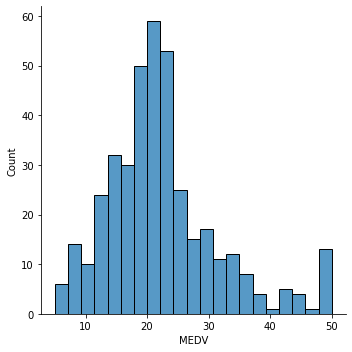

In [62]:
sns.displot(data['MEDV'])

In [63]:
# Removing the outliers using the quantile method

Q1=data['MEDV'].quantile(0.25)
Q3=data['MEDV'].quantile(0.75)
Q1,Q3
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit
data=data[(data['MEDV']>lower_limit)&(data['MEDV']<upper_limit)]

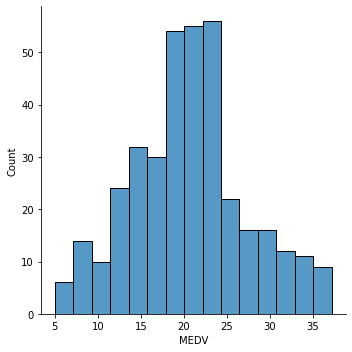

In [64]:
sns.displot(data['MEDV'])

In [65]:
# Printing correlation matrix after removing outliers

data.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.18,0.39,-0.06,0.41,-0.22,0.34,-0.37,0.61,0.56,0.26,-0.38,0.46,-0.50
ZN,-0.18,1.00,-0.52,-0.05,-0.51,0.33,-0.55,0.67,-0.29,-0.28,-0.40,0.17,-0.41,0.43
INDUS,0.39,-0.52,1.00,0.04,0.76,-0.38,0.64,-0.72,0.59,0.72,0.37,-0.34,0.60,-0.62
CHAS,-0.06,-0.05,0.04,1.00,0.08,0.08,0.07,-0.09,-0.01,-0.05,-0.10,0.07,0.01,0.11
NOX,0.41,-0.51,0.76,0.08,1.00,-0.31,0.73,-0.77,0.63,0.68,0.20,-0.38,0.60,-0.58
RM,-0.22,0.33,-0.38,0.08,-0.31,1.00,-0.27,0.27,-0.20,-0.27,-0.27,0.09,-0.60,0.60
AGE,0.34,-0.55,0.64,0.07,0.73,-0.27,1.00,-0.75,0.44,0.51,0.27,-0.29,0.63,-0.56
DIS,-0.37,0.67,-0.72,-0.09,-0.77,0.27,-0.75,1.00,-0.48,-0.54,-0.26,0.29,-0.55,0.44
RAD,0.61,-0.29,0.59,-0.01,0.63,-0.20,0.44,-0.48,1.00,0.90,0.43,-0.44,0.52,-0.53
TAX,0.56,-0.28,0.72,-0.05,0.68,-0.27,0.51,-0.54,0.90,1.00,0.42,-0.44,0.57,-0.62


In [66]:
# Using all columns as predictor except MEDV and MEDV as the output

x = data.drop('MEDV', axis=1)
y = data['MEDV']

In [67]:
# Training first model with all columns as predictor except MEDV

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=25)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x_test, y_test))

0.8336961211142478


In [68]:
# Printing the mean squared error of the output

error = np.sqrt(mean_squared_error(y_test, y_pred))

print ("error: {}".format(error))

error: 3.034931460076562


In [69]:
# Training the second model with the predictors with value greater than 0.5 and less than -0.5

x1 = data[['CRIM','NOX','INDUS','RM','RAD','AGE','TAX','PTRATIO','LSTAT']]
y1 = data['MEDV']

x_train1, x_test1, y_train1, y_test1 = train_test_split (x1, y1, test_size=0.2, random_state=25)

model1 = LinearRegression()
model1.fit(x_train1, y_train1)
y_pred1 = model1.predict(x_test1)
print(model1.score(x_test1, y_test1))

0.8164335349767669


In [70]:
# Printing the mean squared error of second model

error1 = np.sqrt(mean_squared_error(y_test1, y_pred1))

print ("error: {}".format(error))

error: 3.034931460076562
